# Media Mix Modeling for Animation: Model Evaluation - v1

1. Pooling Type: ***Partial***
2. Normalization: 
 - target_norm_method=2 --> ***per dma across target normalization***
 - media_norm_method=2 --> ***per dma across media normalization***

## 1. Use Pre-Processed Media Mix Data

In [1]:
### 0. Load Required Packages and Utility Functions
defaultW = getOption("warn") 
options(warn = -1) 
options(scipen = 10000)
suppressPackageStartupMessages({
    library(rstan)
    options(mc.cores = parallel::detectCores())
    rstan_options(auto_write = TRUE)
    Sys.setenv(LOCAL_CPPFLAGS = '-march=native')
    

    library(brms)
    library(lme4)
    library(here)
    library(tidyverse)
    library(tidybayes)
    library(bayesplot)
    library(lubridate)
    library(zoo)
})

source("Packages/Utility_Functions_MMM.R")



### 1. Use Pre-Processed Media Mix Data
load("RData/data_XyZ_ts.RData")
load("RData/pp_MMM_ts_xy995.RData")
load("RData/pp_MMM_ts.RData")

load("RData/data_XyZ_ts_comp.RData")
load("RData/pp_MMM_ts_comp_xy995.RData")

## 2. Create Stan Data

In [2]:
### 2. Create Stan Data
#------------------------------------------------------------#
# Target:              True Gross Adds                       #
# Media Normalization: across dma per media normalization    #
#------------------------------------------------------------#
var_target      = 'gross_add_true'
var_control     = c('seasonality_gross_add_true','AR1', 'tp_price','competition','inflation','weather1','weather3')
var_control2    = c('seasonality_gross_add_true','AR1', 'tp_price','competition','inflation','weather1','weather3','competitive_offer', 'istart_offer' ,'financial_offer')
var_control8    = c('seasonality_gross_add_true','AR1', 'tp_price','comp_index','inflation','weather1','weather3','competitive_offer','istart_offer','financial_offer','price_for_life','covid_emergency','big_holiday')
var_control16   = c('seasonality_gross_add_true','AR1', 'tp_price','comp_index','inflation','weather1','weather3','competitive_offer','istart_offer','financial_offer','price_for_life','covid_emergency','big_holiday','summer_promo_end','snow','covid_daily_confirmed_cases')
var_control17   = c('seasonality_gross_add_true','AR1', 'tp_price','comp_index','inflation','weather1','weather3','competitive_offer','istart_offer','financial_offer','price_for_life','covid_emergency','big_holiday','summer_promo_end','snow','covid_daily_confirmed_cases','q4_tag')
var_control18   = c('seasonality_gross_add_true','AR1', 'price_hybrid','comp_index','inflation','weather1','weather3','competitive_offer','istart_offer','financial_offer','price_for_life','covid_emergency','big_holiday','summer_promo_end','snow','covid_daily_confirmed_cases','anom_opt')
var_control19   = c('seasonality_gross_add_true','AR1', 'price_hybrid','competition','inflation','weather1','weather3','competitive_offer','istart_offer','financial_offer','price_for_life','covid_emergency','big_holiday','summer_promo_end','snow','covid_daily_confirmed_cases')
# Print media variables
print_media_names(pp_MMM_ls = pp_MMM_ts_xy995)



#------------------------------------------------------------#
# Partial Pooling                                            #
#------------------------------------------------------------#
# One can choose one of ("partial", "no", "complete") pooling types.
pooling_type   = "partial"

# Choose the beginning of test date.
test_date      = NULL      

# Specify prior values for media parameters
# Provide (1) median/mean and (2) standard deviation of each of the media parameters
media_priors_00   = list(median = rep(0, 10), std = rep(1, 10))
media_priors_10   = list(median = rep(0.10, 10), std = rep(1, 10))
media_priors_20   = list(median = rep(0.20, 10), std = rep(1, 10))
media_priors_30   = list(median = rep(0.30, 10), std = rep(1, 10))






Note: Selected Media Mix Variables for Modeling
 [1] "tv_spend"                    "dm_spend"                   
 [3] "paid_search_spend_brand"     "paid_search_spend_unbranded"
 [5] "display_spend"               "radio_spend"                
 [7] "video_spend"                 "print_spend"                
 [9] "social_spend"                "audio_spend"                


In [4]:
### Create stan_data from `make_stan_data_MMM` for all PP norm.
stan_data_PP_44_10_C18      = make_stan_data_MMM(pp_MMM_ls          = pp_MMM_ts_comp_xy995,
                                       target_norm_method = 4,
                                       media_norm_method  = 4,
                                       var_target         = var_target,
                                       var_control        = var_control18,
                                       df_geo             = NULL,
                                       test_date          = test_date,
                                       pooling_type       = pooling_type,
                                       media_priors       = media_priors_10)




Note: How to Make Stan Data
1. Use Preprocessed Media Mix Data
 - Media mix data should be preprocessed by `preprocess_MMM()`.

2. Choose a Target Normalization Method
 - target_norm_method=4 --> across dma across target normalization

3. Choose a Media Normalization Method
 - media_norm_method=4 --> across dma across media normalization

4. Create Train/Test Data
 - The entire data will be used for model calibration as follows:

|Sample_Type | Sample_Size| Sample_Pct| N_Period|First_Date |Last_Date  |
|:-----------|-----------:|----------:|--------:|:----------|:----------|
|All         |        5850|        100|      195|2017-12-31 |2021-09-19 |
|Train       |        5850|        100|      195|2017-12-31 |2021-09-19 |
|Test        |           0|          0|        0|NA         |NA         |

5. Specify Priors for Media Parameters
 - The user-defined priors will be used as follows:

|Media_Mix                   |Pooling_Type |Distribution | Median|  Mean|  Mode| STD|
|:--------------

In [3]:
### Create stan_data from `make_stan_data_MMM` for all PP norm.
stan_data_PP_44_10_C19      = make_stan_data_MMM(pp_MMM_ls          = pp_MMM_ts_comp_xy995,
                                       target_norm_method = 4,
                                       media_norm_method  = 4,
                                       var_target         = var_target,
                                       var_control        = var_control19,
                                       df_geo             = NULL,
                                       test_date          = test_date,
                                       pooling_type       = pooling_type,
                                       media_priors       = media_priors_10)




Note: How to Make Stan Data
1. Use Preprocessed Media Mix Data
 - Media mix data should be preprocessed by `preprocess_MMM()`.

2. Choose a Target Normalization Method
 - target_norm_method=4 --> across dma across target normalization

3. Choose a Media Normalization Method
 - media_norm_method=4 --> across dma across media normalization

4. Create Train/Test Data
 - The entire data will be used for model calibration as follows:

|Sample_Type | Sample_Size| Sample_Pct| N_Period|First_Date |Last_Date  |
|:-----------|-----------:|----------:|--------:|:----------|:----------|
|All         |        5850|        100|      195|2017-12-31 |2021-09-19 |
|Train       |        5850|        100|      195|2017-12-31 |2021-09-19 |
|Test        |           0|          0|        0|NA         |NA         |

5. Specify Priors for Media Parameters
 - The user-defined priors will be used as follows:

|Media_Mix                   |Pooling_Type |Distribution | Median|  Mean|  Mode| STD|
|:--------------

## 3. Diagnose MCMC

In [5]:
#################################################################################
### 4. Model Evaluation                                                       ###
###                                                                           ###
### (1) Use `diagnose_MCMC`.                                                  ###
### (2) Use `evaluate_MMM`.                                                   ###
###                                                                           ###
#################################################################################
# load("RData/stan_fit_CP.RData")


load("model_fits/fit_PP_44_10_C18_xy995.RData")


### 1. Diagnose the Stan Fit
#------------------------------------------------------------#
# MCMC Conditions                                            #
#------------------------------------------------------------#
num_chains     = 4
num_iterations = 2000
num_warmups    = 1000
num_treedepth  = 15
stanfit_44_10_C18        = fit_PP_44_10_C18_xy995



DIA_PP_44_10_C18   = diagnose_MCMC(var_target    = var_target,
                         stanfit       = stanfit_44_10_C18,
                         chains        = num_chains,
                         iter          = num_iterations,
                         warmup        = num_warmups,
                         max_treedepth = num_treedepth)







MCMC Diagnostics
------------------------------------------------------------
0. Target: gross_add_true 

1. Divergence
 - The total number of iterations: 4,000 
 - Iterations with divergences   : 0 
 - Divergence %                  : 0.00% 



`summarise()` has grouped output by 'warmup_period'. You can override using the `.groups` argument.



2. Treedepth
 - The total number of iterations: 4,000 
 - Iterations with max treedepth : 0 
 - Max treedepth %               : 0.00% 

3. n_eff, Effective Sample Size
 - The number of model parameters: 6,762 
 - The evaluation criterion      : n_eff > 1% of iterations
 - Parameters with the problem   : 0 
 - Small n_eff parameter %       : 0.00% 

4. Rhat, Potential Scale Reduction Factor
 - The number of model parameters: 6,762 
 - The evaluation criterion      : Rhat < 1.05
 - Parameters with the problem   : 0 
 - Poor mixing parameter %       : 0.00% 



In [4]:
#################################################################################
### 4. Model Evaluation                                                       ###
###                                                                           ###
### (1) Use `diagnose_MCMC`.                                                  ###
### (2) Use `evaluate_MMM`.                                                   ###
###                                                                           ###
#################################################################################
# load("RData/stan_fit_CP.RData")


load("model_fits/fit_PP_44_10_C19_xy995.RData")


### 1. Diagnose the Stan Fit
#------------------------------------------------------------#
# MCMC Conditions                                            #
#------------------------------------------------------------#
num_chains     = 4
num_iterations = 2000
num_warmups    = 1000
num_treedepth  = 15
stanfit_44_10_C19        = fit_PP_44_10_C19_xy995



DIA_PP_44_10_C19   = diagnose_MCMC(var_target    = var_target,
                         stanfit       = stanfit_44_10_C19,
                         chains        = num_chains,
                         iter          = num_iterations,
                         warmup        = num_warmups,
                         max_treedepth = num_treedepth)







MCMC Diagnostics
------------------------------------------------------------
0. Target: gross_add_true 

1. Divergence
 - The total number of iterations: 4,000 
 - Iterations with divergences   : 0 
 - Divergence %                  : 0.00% 



`summarise()` has grouped output by 'warmup_period'. You can override using the `.groups` argument.



2. Treedepth
 - The total number of iterations: 4,000 
 - Iterations with max treedepth : 0 
 - Max treedepth %               : 0.00% 

3. n_eff, Effective Sample Size
 - The number of model parameters: 6,731 
 - The evaluation criterion      : n_eff > 1% of iterations
 - Parameters with the problem   : 0 
 - Small n_eff parameter %       : 0.00% 

4. Rhat, Potential Scale Reduction Factor
 - The number of model parameters: 6,731 
 - The evaluation criterion      : Rhat < 1.05
 - Parameters with the problem   : 0 
 - Poor mixing parameter %       : 0.00% 



In [4]:
#################################################################################
### 4. Model Evaluation                                                       ###
###                                                                           ###
### (1) Use `diagnose_MCMC`.                                                  ###
### (2) Use `evaluate_MMM`.                                                   ###
###                                                                           ###
#################################################################################
# load("RData/stan_fit_CP.RData")


load("model_fits/fit_PP_44_10_C19_xy995_beta_res.RData")


### 1. Diagnose the Stan Fit
#------------------------------------------------------------#
# MCMC Conditions                                            #
#------------------------------------------------------------#
num_chains     = 4
num_iterations = 2000
num_warmups    = 1000
num_treedepth  = 15
stanfit_44_10_C19        = fit_PP_44_10_C19_xy995_beta_res



DIA_PP_44_10_C19   = diagnose_MCMC(var_target    = var_target,
                         stanfit       = stanfit_44_10_C19,
                         chains        = num_chains,
                         iter          = num_iterations,
                         warmup        = num_warmups,
                         max_treedepth = num_treedepth)







MCMC Diagnostics
------------------------------------------------------------
0. Target: gross_add_true 

1. Divergence
 - The total number of iterations: 4,000 
 - Iterations with divergences   : 0 
 - Divergence %                  : 0.00% 



`summarise()` has grouped output by 'warmup_period'. You can override using the `.groups` argument.



2. Treedepth
 - The total number of iterations: 4,000 
 - Iterations with max treedepth : 0 
 - Max treedepth %               : 0.00% 

3. n_eff, Effective Sample Size
 - The number of model parameters: 6,731 
 - The evaluation criterion      : n_eff > 1% of iterations
 - Parameters with the problem   : 0 
 - Small n_eff parameter %       : 0.00% 

4. Rhat, Potential Scale Reduction Factor
 - The number of model parameters: 6,731 
 - The evaluation criterion      : Rhat < 1.05
 - Parameters with the problem   : 0 
 - Poor mixing parameter %       : 0.00% 



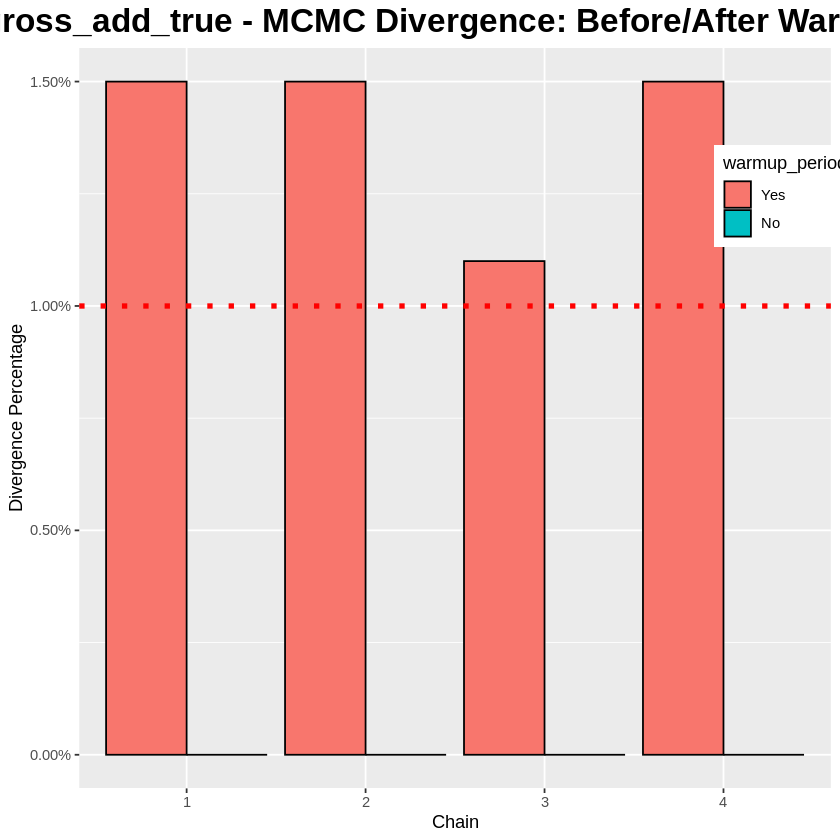

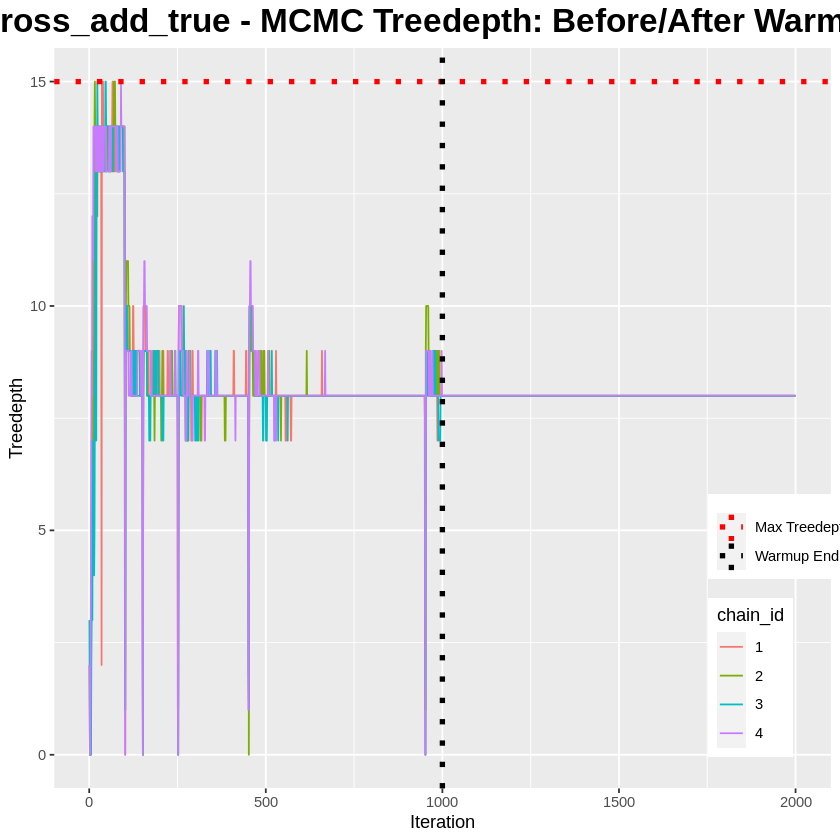

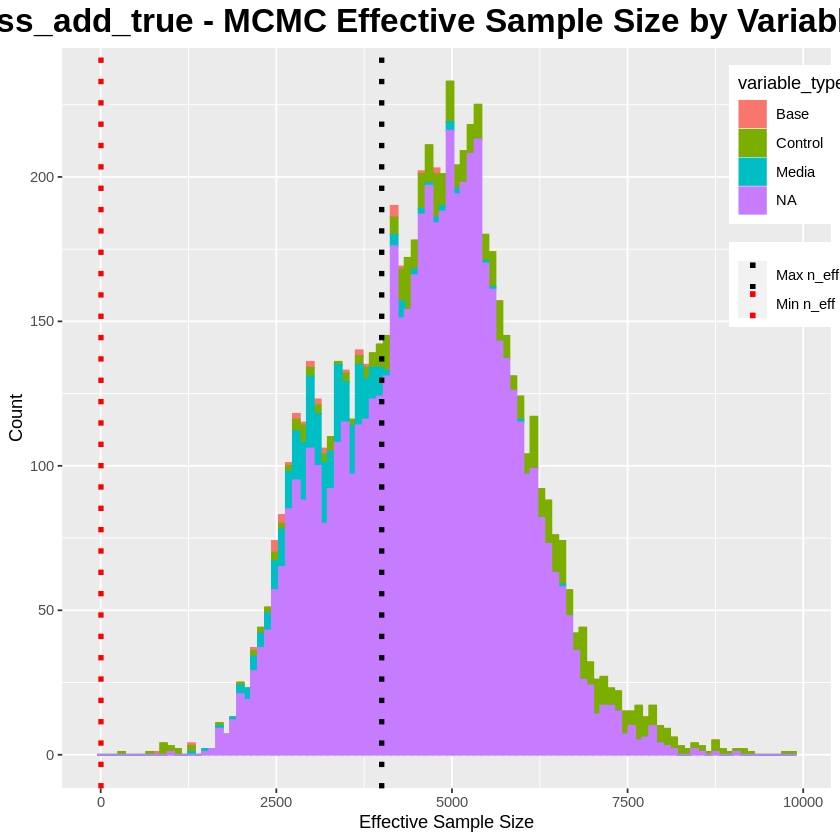

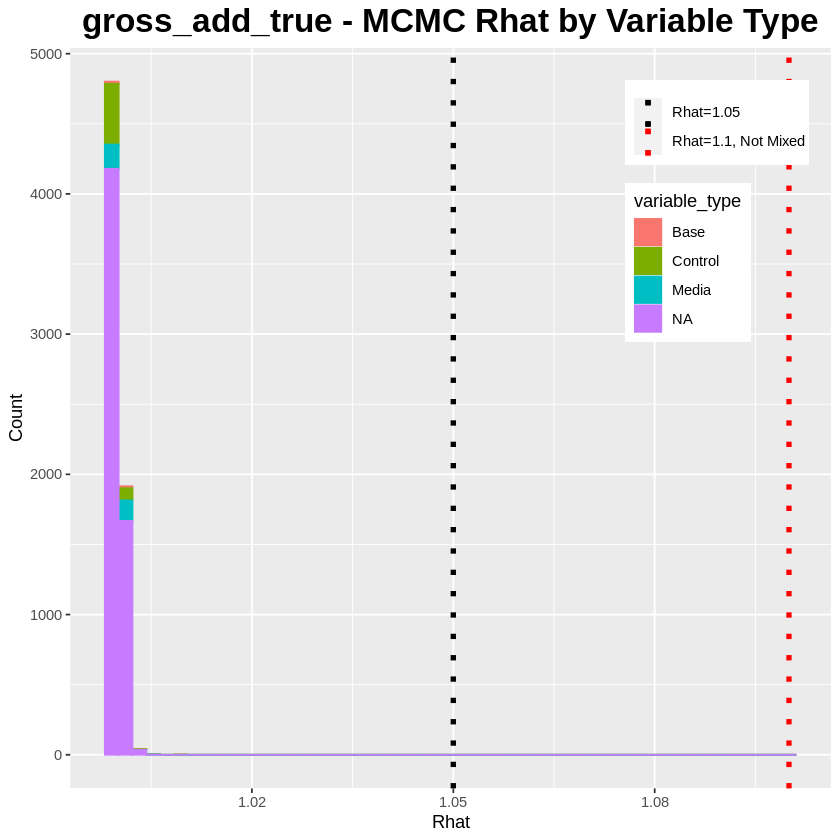

In [6]:
##xy995 
DIA_PP_44_10_C18$divergence
DIA_PP_44_10_C18$treedepth
DIA_PP_44_10_C18$n_eff
DIA_PP_44_10_C18$Rhat

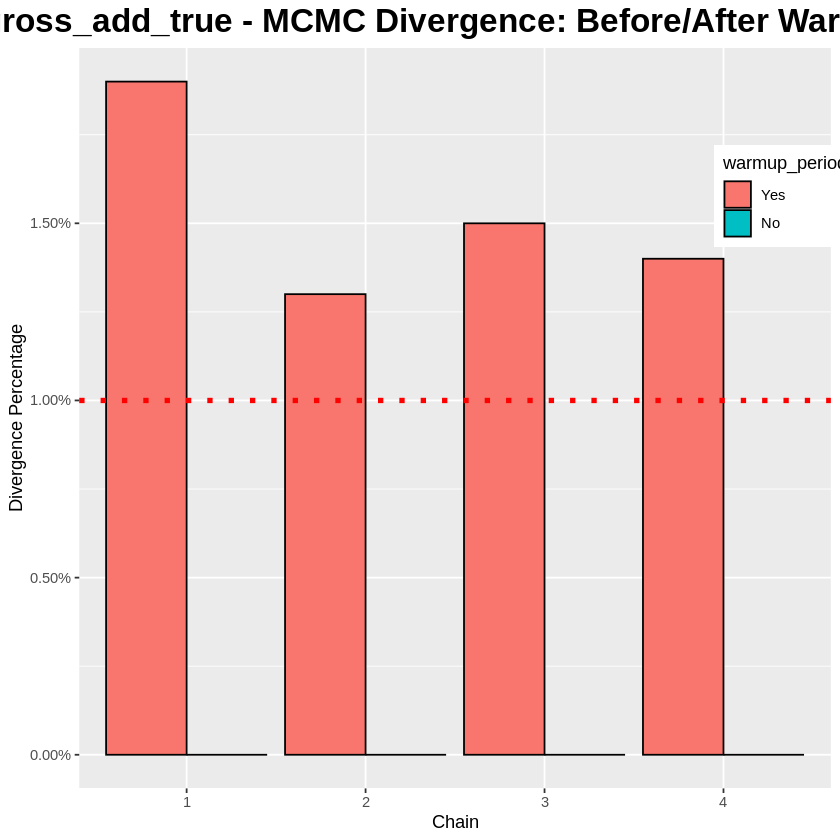

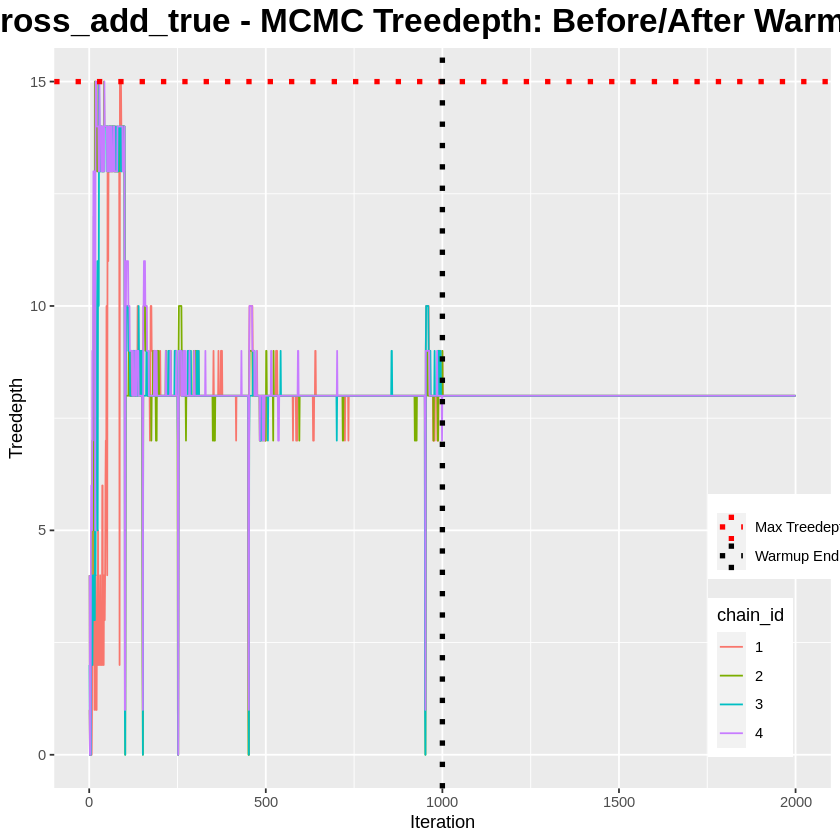

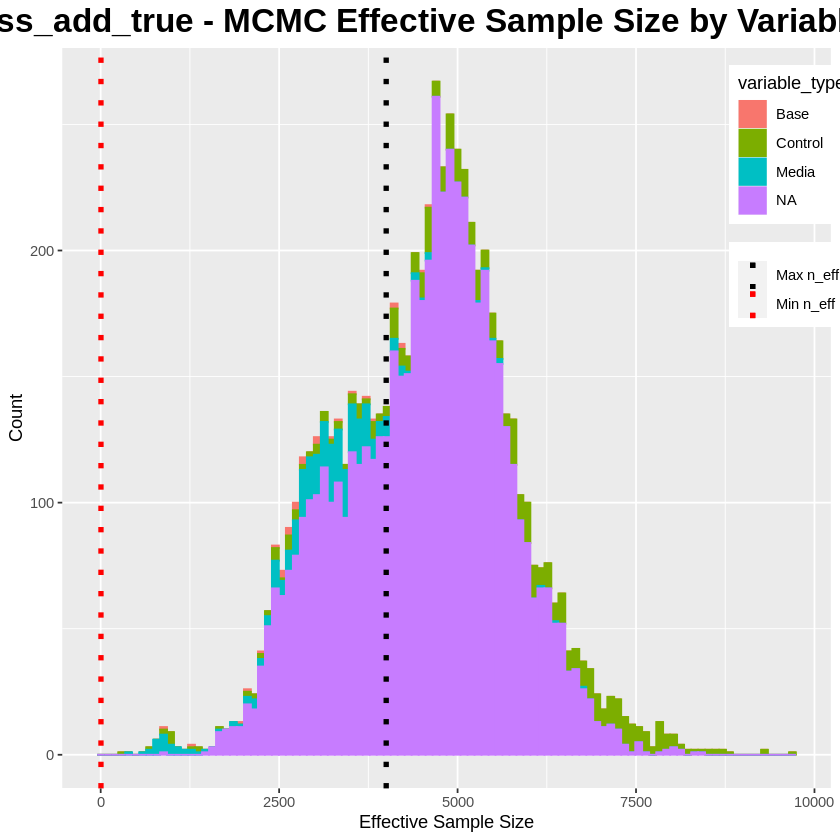

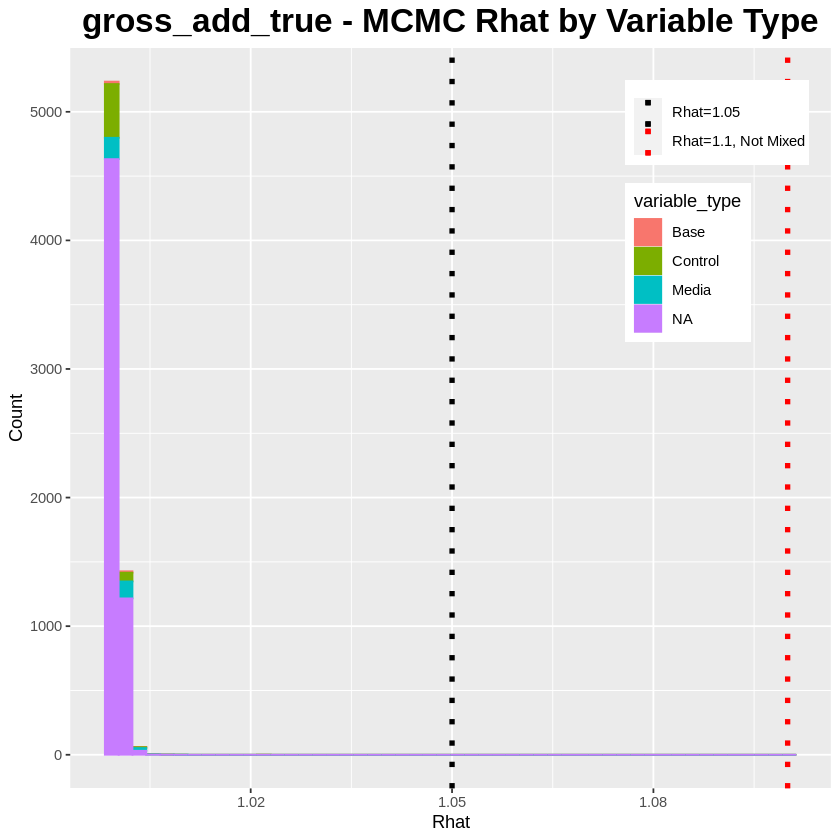

In [5]:
##xy995 
DIA_PP_44_10_C19$divergence
DIA_PP_44_10_C19$treedepth
DIA_PP_44_10_C19$n_eff
DIA_PP_44_10_C19$Rhat

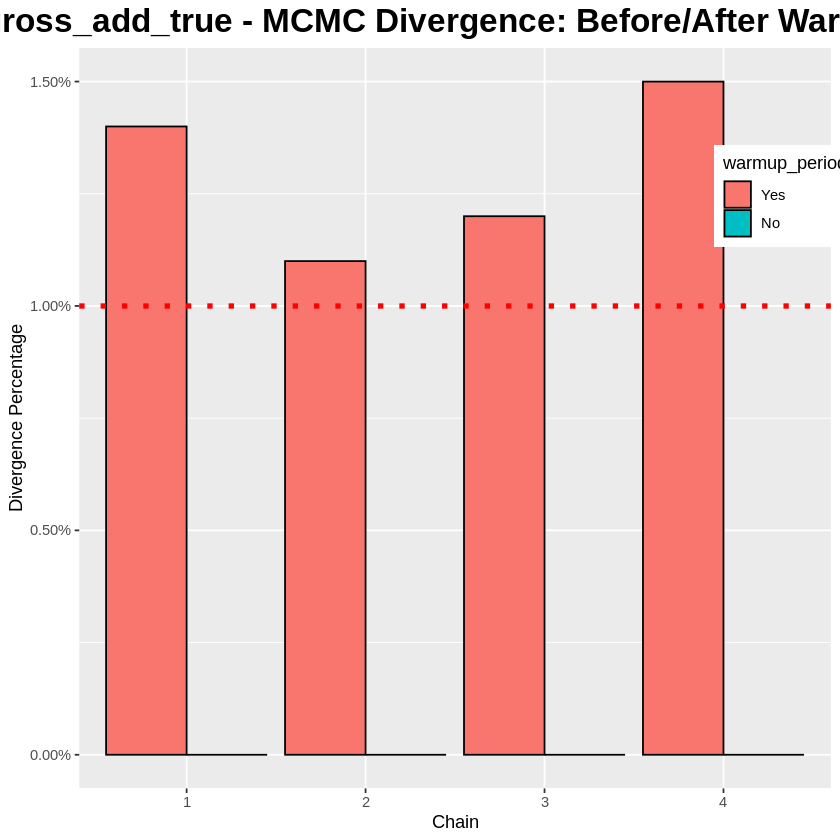

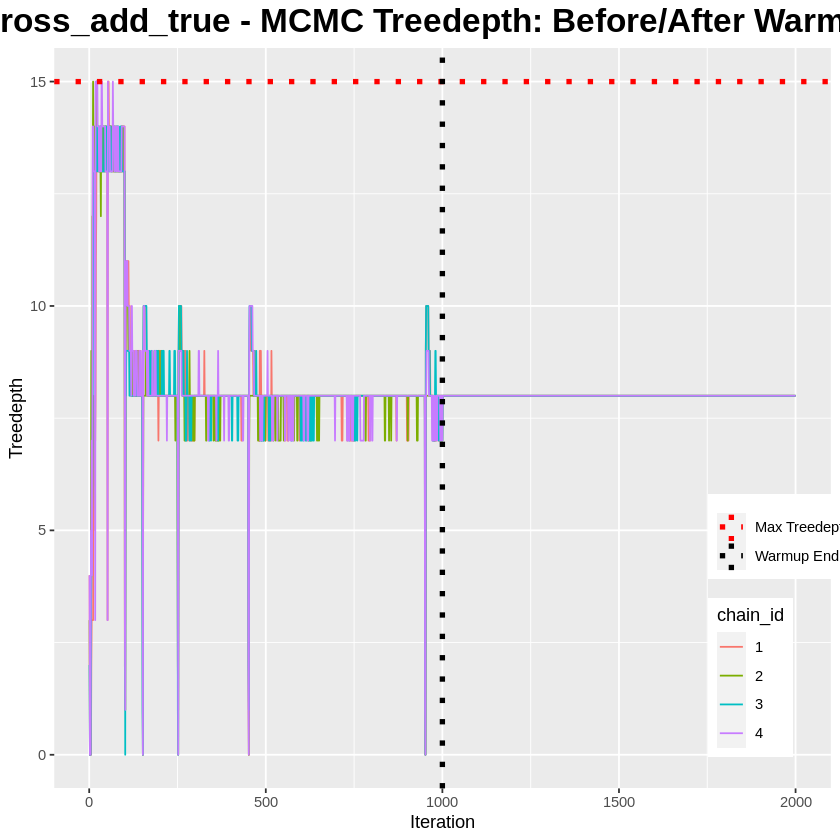

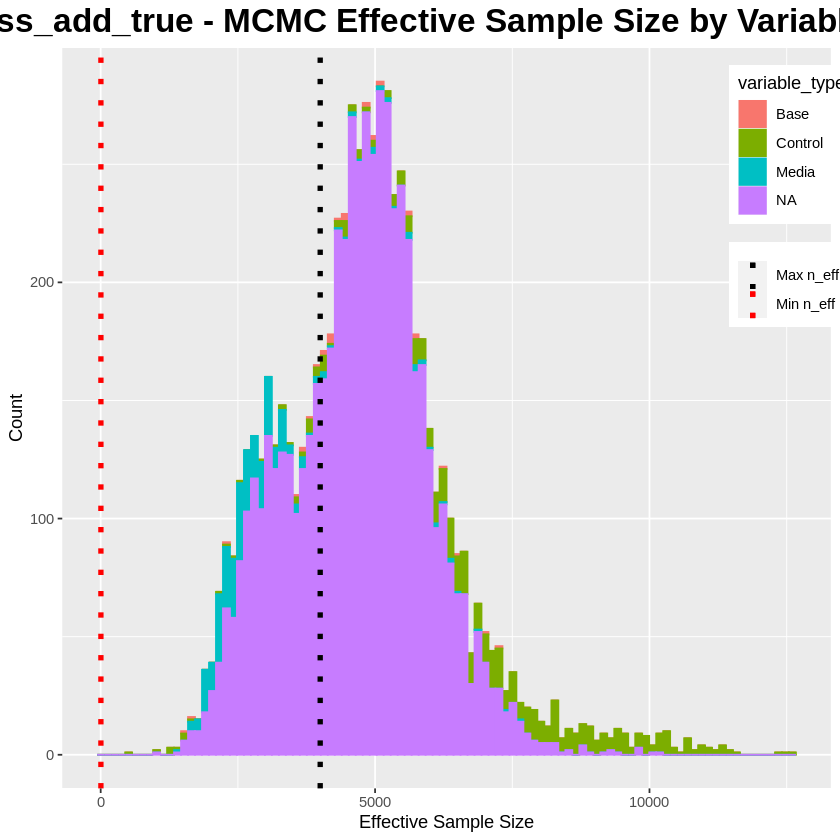

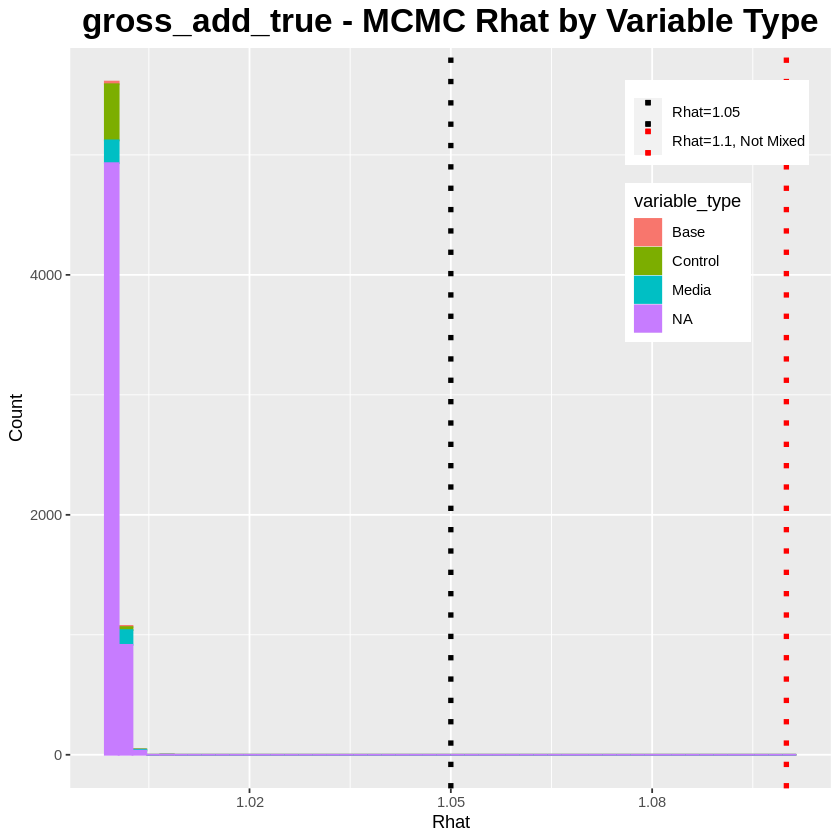

In [ ]:
##xy995 - beta_res
DIA_PP_44_10_C19$divergence
DIA_PP_44_10_C19$treedepth
DIA_PP_44_10_C19$n_eff
DIA_PP_44_10_C19$Rhat

## 4. Evaluate MMM

In [7]:
### Partial Pooling - 44 - C18 - 10 - xy995
df_XyZ         = data_XyZ_ts
pp_MMM_ls      = pp_MMM_ts_comp_xy995
standata       = stan_data_PP_44_10_C18
stanfit        = fit_PP_44_10_C18_xy995
media_positive = TRUE
#pooling_type   = "partial"

t0       = Sys.time()
EVA_PP_44_10_C18   = evaluate_MMM(df_XyZ         = df_XyZ,
                        pp_MMM_ls      = pp_MMM_ls,
                        standata       = standata,
                        stanfit        = stanfit,
                        media_positive = media_positive,
                        pooling_type_media   = pooling_type)

t1       = Sys.time()
Runtime  = t1 - t0
print(Runtime)

# Time difference of 19.10957 mins

`summarise()` has grouped output by '.draw', 'group'. You can override using the `.groups` argument.

`summarise()` has grouped output by '.draw'. You can override using the `.groups` argument.

`summarise()` has grouped output by '.draw', 'group'. You can override using the `.groups` argument.

`summarise()` has grouped output by '.draw'. You can override using the `.groups` argument.

`summarise()` has grouped output by '.draw', 'group'. You can override using the `.groups` argument.

`summarise()` has grouped output by '.draw'. You can override using the `.groups` argument.

`summarise()` has grouped output by 'group'. You can override using the `.groups` argument.

`summarise()` has grouped output by 'group', 'variable_id', 'variable_name'. You can override using the `.groups` argument.

`summarise()` has grouped output by 'group'. You can override using the `.groups` argument.

`summarise()` has grouped output by 'group'. You can override using the `.groups` argument.

`summarise(

Time difference of 26.92227 mins


In [6]:
### Partial Pooling - 44 - C19 - 10 - xy995
df_XyZ         = data_XyZ_ts
pp_MMM_ls      = pp_MMM_ts_comp_xy995
standata       = stan_data_PP_44_10_C19
stanfit        = fit_PP_44_10_C19_xy995
media_positive = TRUE
#pooling_type   = "partial"

t0       = Sys.time()
EVA_PP_44_10_C19   = evaluate_MMM(df_XyZ         = df_XyZ,
                        pp_MMM_ls      = pp_MMM_ls,
                        standata       = standata,
                        stanfit        = stanfit,
                        media_positive = media_positive,
                        pooling_type_media   = pooling_type)

t1       = Sys.time()
Runtime  = t1 - t0
print(Runtime)

# Time difference of 19.10957 mins

`summarise()` has grouped output by '.draw', 'group'. You can override using the `.groups` argument.

`summarise()` has grouped output by '.draw'. You can override using the `.groups` argument.

`summarise()` has grouped output by '.draw', 'group'. You can override using the `.groups` argument.

`summarise()` has grouped output by '.draw'. You can override using the `.groups` argument.

`summarise()` has grouped output by '.draw', 'group'. You can override using the `.groups` argument.

`summarise()` has grouped output by '.draw'. You can override using the `.groups` argument.

`summarise()` has grouped output by 'group'. You can override using the `.groups` argument.

`summarise()` has grouped output by 'group', 'variable_id', 'variable_name'. You can override using the `.groups` argument.

`summarise()` has grouped output by 'group'. You can override using the `.groups` argument.

`summarise()` has grouped output by 'group'. You can override using the `.groups` argument.

`summarise(

Time difference of 26.31552 mins


In [ ]:
### Partial Pooling - 44 - C19 - 10 - xy995 - beta restricted
df_XyZ         = data_XyZ_ts
pp_MMM_ls      = pp_MMM_ts_comp_xy995
standata       = stan_data_PP_44_10_C19
stanfit        = fit_PP_44_10_C19_xy995_beta_res
media_positive = TRUE
#pooling_type   = "partial"

t0       = Sys.time()
EVA_PP_44_10_C19   = evaluate_MMM(df_XyZ         = df_XyZ,
                        pp_MMM_ls      = pp_MMM_ls,
                        standata       = standata,
                        stanfit        = stanfit,
                        media_positive = media_positive,
                        pooling_type_media   = pooling_type)

t1       = Sys.time()
Runtime  = t1 - t0
print(Runtime)

# Time difference of 19.10957 mins

`summarise()` has grouped output by '.draw', 'group'. You can override using the `.groups` argument.

`summarise()` has grouped output by '.draw'. You can override using the `.groups` argument.

`summarise()` has grouped output by '.draw', 'group'. You can override using the `.groups` argument.

`summarise()` has grouped output by '.draw'. You can override using the `.groups` argument.

`summarise()` has grouped output by '.draw', 'group'. You can override using the `.groups` argument.

`summarise()` has grouped output by '.draw'. You can override using the `.groups` argument.

`summarise()` has grouped output by 'group'. You can override using the `.groups` argument.

`summarise()` has grouped output by 'group', 'variable_id', 'variable_name'. You can override using the `.groups` argument.

`summarise()` has grouped output by 'group'. You can override using the `.groups` argument.

`summarise()` has grouped output by 'group'. You can override using the `.groups` argument.

`summarise(

Time difference of 26.49557 mins


In [ ]:
#save(EVA_NP_22_00_C1,file = 'Eval_NP_22_00_C1.RData')

### Posterior distributions

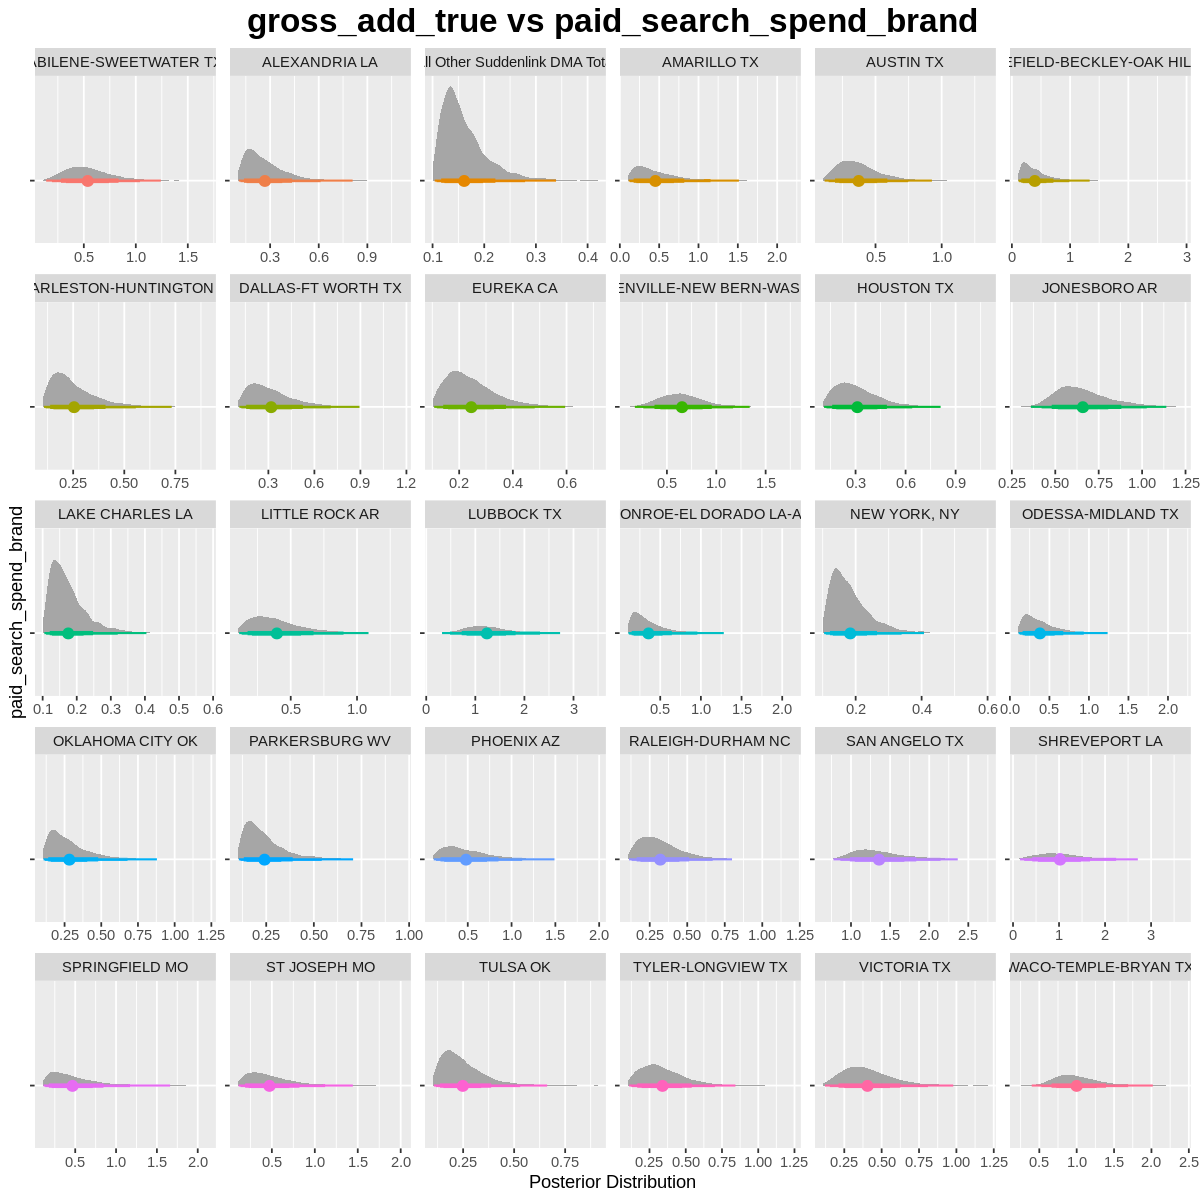

In [8]:
##Base Model - Unrestricted
options(repr.plot.width=10, repr.plot.height = 10) 
EVA_PP_44_10_C19$geo_para_plot$media$paid_search_spend_brand

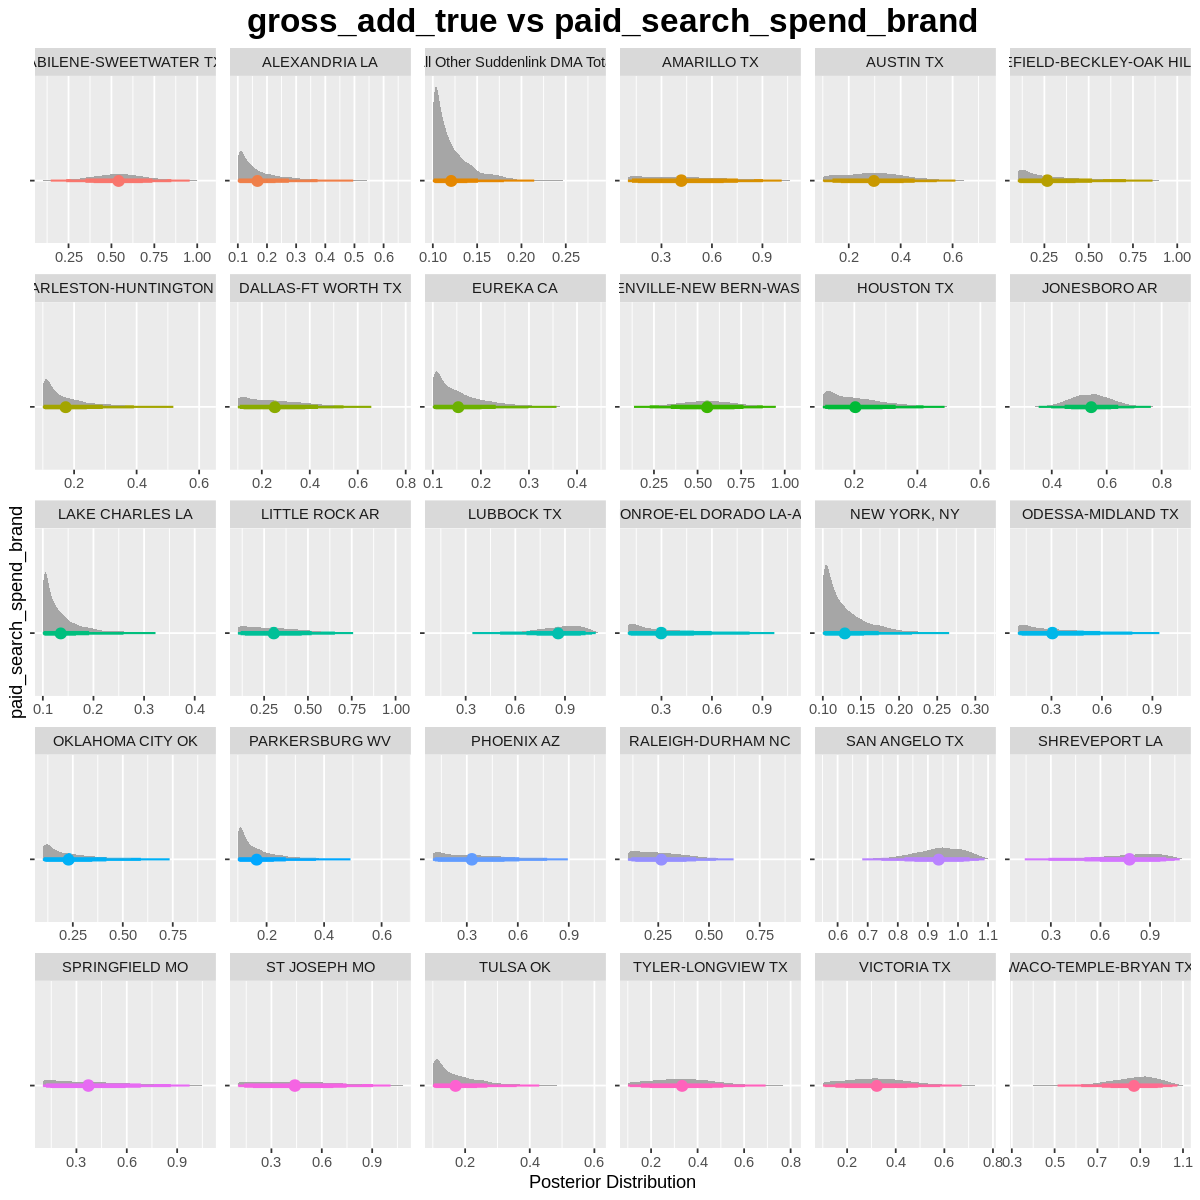

In [7]:
##Base Model - restricted
options(repr.plot.width=10, repr.plot.height = 10) 
EVA_PP_44_10_C19$geo_para_plot$media$paid_search_spend_brand

### Media Parameters

In [ ]:
EVA_PP_44_10_C1$pop_para_stat$alpha_K_S %>% filter(metric %in% c("alpha"))

In [ ]:
EVA_PP_44_10_C2$pop_para_stat$alpha_K_S %>% filter(metric %in% c("alpha"))

In [ ]:
EVA_PP_44_10_C8$pop_para_stat$control 

In [ ]:
EVA_PP_44_10_C16$pop_para_stat$control 

In [ ]:
EVA_PP_44_10_C18$geo_para_stat$media %>%
summarise_at(.vars = vars(Max),.funs = max)

In [ ]:
##Restricted beta
EVA_PP_44_10_C18$geo_para_stat$media %>%
summarise_at(.vars = vars(Max),.funs = max)

### Model Fits

In [10]:
EVA_PP_44_10_C18$y_fitted_stat$all

group,metric,sample_type,N,Mean,Median,StdDev,Min,Max,Range,⋯,q005,q01,q015,q025,q075,q085,q09,q095,q0975,q099
<fct>,<fct>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Altice,r2,Train,4000,0.80860536,0.80966165,0.0122143615,0.75541462,0.84465695,0.089242323,⋯,0.78689621,0.79226285,0.79617864,0.80123892,0.81716157,0.82095909,0.82338287,0.82686258,0.82941296,0.83204031
Altice,mape,Train,4000,4.72885526,4.71381152,0.1860830371,4.25690502,5.47689570,1.219990676,⋯,4.45281983,4.50190197,4.53997766,4.59238214,4.84450536,4.92147843,4.98104715,5.06467011,5.12292852,5.20377252
Altice,rmse,Train,4000,1003.30138537,999.99552064,37.6292624990,889.82798842,1168.64570086,278.817712441,⋯,947.73927281,957.23523577,964.42384161,975.85126203,1026.79296321,1042.42307159,1053.63893268,1070.26336938,1081.76065392,1100.12485157
Altice,nrmse,Train,4000,0.06517483,0.06496008,0.0024444110,0.05780356,0.07591566,0.018112103,⋯,0.06156550,0.06218236,0.06264933,0.06339166,0.06670086,0.06771619,0.06844478,0.06952471,0.07027158,0.07146452
Altice,mae,Train,4000,797.84250040,795.61844750,30.5756942058,714.55396385,925.91655405,211.362590200,⋯,752.71606450,760.94711081,766.63305870,775.35202894,816.97490623,829.51811794,838.90539320,852.39641264,863.55239073,875.07935445
Optimum,r2,Train,4000,0.67211397,0.67460117,0.0270198458,0.54418917,0.73656913,0.192379956,⋯,0.62305059,0.63596287,0.64453406,0.65620229,0.69140922,0.69947570,0.70439714,0.71118253,0.71647970,0.72200728
Optimum,mape,Train,4000,6.87606614,6.84265768,0.3648735913,5.93773571,8.58217367,2.644437965,⋯,6.34581416,6.42997672,6.50515276,6.61246346,7.10143511,7.24228707,7.35955449,7.52752702,7.67021342,7.87349765
Optimum,rmse,Train,4000,816.96029362,813.09798140,39.8052843457,714.98425423,1000.39747385,285.413219625,⋯,758.08247051,768.52445229,776.45837157,787.74619611,842.02324192,858.89637440,870.44506184,888.07843096,902.68674997,924.14743641
Optimum,nrmse,Train,4000,0.08850182,0.08808341,0.0043121313,0.07745469,0.10837368,0.030918992,⋯,0.08212355,0.08325473,0.08411422,0.08533704,0.09121690,0.09304478,0.09429586,0.09620609,0.09778862,0.10011347


In [7]:
EVA_PP_44_10_C19$y_fitted_stat$all

group,metric,sample_type,N,Mean,Median,StdDev,Min,Max,Range,⋯,q005,q01,q015,q025,q075,q085,q09,q095,q0975,q099
<fct>,<fct>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Altice,r2,Train,4000,0.80301252,0.80409511,0.0130635537,0.74054134,0.83661876,0.096077414,⋯,0.77895629,0.78595156,0.78998532,0.79494864,0.81246648,0.81631867,0.81860414,0.82249762,0.82534537,0.82816385
Altice,mape,Train,4000,4.81025900,4.79476057,0.1954644024,4.30024242,5.66402419,1.363781768,⋯,4.51787821,4.57035114,4.61176650,4.67252718,4.93179795,5.02029931,5.07232488,5.15711365,5.22789644,5.33316926
Altice,rmse,Train,4000,1017.83845033,1014.77592020,38.6792836613,912.65989153,1185.26784062,272.607949099,⋯,959.97544576,971.64267743,978.95393915,990.40748589,1041.65617794,1058.57563459,1070.54546338,1086.83339439,1102.33194795,1120.41302194
Altice,nrmse,Train,4000,0.06611917,0.06592022,0.0025126207,0.05928673,0.07699544,0.017708714,⋯,0.06236036,0.06311827,0.06359321,0.06433724,0.06766638,0.06876547,0.06954303,0.07060110,0.07160790,0.07278245
Altice,mae,Train,4000,806.71767048,804.28034684,32.3009900603,725.82357217,940.71655740,214.892985231,⋯,758.36222602,767.20608494,774.02677426,783.91821347,826.43076922,840.99009260,849.88805220,864.62819029,875.15740904,892.25134517
Optimum,r2,Train,4000,0.66752344,0.67069159,0.0260151061,0.55063669,0.73091662,0.180279922,⋯,0.62054250,0.63296570,0.64088151,0.65150931,0.68645296,0.69314808,0.69802157,0.70475106,0.70983620,0.71482555
Optimum,mape,Train,4000,6.88631505,6.84616819,0.3629617734,5.84534137,8.33060796,2.485266593,⋯,6.35549944,6.44506012,6.52122156,6.63028885,7.11414183,7.25749537,7.38196285,7.52820293,7.66948823,7.87904949
Optimum,rmse,Train,4000,820.00489603,816.34727570,38.1846436901,728.08497766,1001.18518623,273.100208572,⋯,764.03140249,773.74529545,781.19172597,792.78925275,843.44863974,859.99564344,870.46698432,887.87048180,904.16905457,924.89487101
Optimum,nrmse,Train,4000,0.08883164,0.08843541,0.0041365663,0.07887390,0.10845902,0.029585116,⋯,0.08276800,0.08382031,0.08462699,0.08588336,0.09137132,0.09316387,0.09429823,0.09618356,0.09794920,0.10019444


In [8]:
##Restricted beta
EVA_PP_44_10_C19$y_fitted_stat$all

group,metric,sample_type,N,Mean,Median,StdDev,Min,Max,Range,⋯,q005,q01,q015,q025,q075,q085,q09,q095,q0975,q099
<fct>,<fct>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Altice,r2,Train,4000,0.80406467,0.80547870,0.0129167062,0.75127675,0.83715736,0.085880613,⋯,0.78110183,0.78682780,0.79057272,0.79605493,0.81329333,0.81706259,0.81945894,0.82291514,0.82537393,0.82860760
Altice,mape,Train,4000,4.78884234,4.77122420,0.1894512895,4.22062972,5.59312734,1.372497626,⋯,4.50952575,4.55805289,4.59413709,4.65509850,4.90214785,4.98435861,5.04204941,5.13064531,5.20813685,5.32639811
Altice,rmse,Train,4000,1014.13451412,1010.92217243,37.9746854823,903.36220093,1175.35284014,271.990639203,⋯,958.28609021,967.51176859,975.28666967,986.64694748,1038.39970643,1054.17067999,1065.15765047,1081.82902889,1096.14695084,1115.33399120
Altice,nrmse,Train,4000,0.06587856,0.06566988,0.0024668498,0.05868275,0.07635136,0.017668614,⋯,0.06225062,0.06284993,0.06335499,0.06409295,0.06745483,0.06847932,0.06919304,0.07027602,0.07120612,0.07245251
Altice,mae,Train,4000,803.70852200,800.60043615,31.5760780399,704.87751655,940.39772423,235.520207682,⋯,756.70316496,765.15977870,771.74765595,781.49628380,822.28295844,836.79195834,845.73194919,860.05523018,873.84134259,891.80007261
Optimum,r2,Train,4000,0.67045525,0.67347375,0.0259324283,0.53107664,0.73103116,0.199954513,⋯,0.62394123,0.63635893,0.64403863,0.65480378,0.68895687,0.69637098,0.70105393,0.70678598,0.71232129,0.71866759
Optimum,mape,Train,4000,6.83717629,6.80337254,0.3546917004,5.87590058,8.45767110,2.581770521,⋯,6.31786978,6.40768166,6.47327974,6.58108282,7.05697635,7.20661098,7.30103811,7.45368627,7.62662785,7.82014833
Optimum,rmse,Train,4000,815.17933765,811.28550475,37.4734818089,720.46219309,967.59053977,247.128346682,⋯,759.40110564,769.30589775,777.24741201,788.26242604,837.86281859,854.46650404,865.97263313,881.67685100,897.49103883,918.26900394
Optimum,nrmse,Train,4000,0.08830889,0.08788707,0.0040595257,0.07804812,0.10481969,0.026771568,⋯,0.08226640,0.08333939,0.08419970,0.08539296,0.09076620,0.09256489,0.09381136,0.09551260,0.09722577,0.09947666


In [9]:
source('Packages/point_est.R')

In [12]:
point_metrics(EVA_PP_44_10_C18)

Note: Using an external vector in selections is ambiguous.
ℹ Use `all_of(stat)` instead of `stat` to silence this message.
ℹ See <https://tidyselect.r-lib.org/reference/faq-external-vector.html>.
This message is displayed once per session.



group,point_rsq,point_MAPE,point_rsq2,r_sq_adj
<fct>,<dbl>,<dbl>,<dbl>,<dbl>
Altice,0.8334259,4.329668,0.8353902,0.8076246
Optimum,0.7276772,5.992124,0.7336627,0.6887383
Suddenlink,0.8598919,4.851706,0.8599055,0.8362751


In [9]:
point_metrics(EVA_PP_44_10_C19)

Note: Using an external vector in selections is ambiguous.
ℹ Use `all_of(stat)` instead of `stat` to silence this message.
ℹ See <https://tidyselect.r-lib.org/reference/faq-external-vector.html>.
This message is displayed once per session.



group,point_rsq,point_MAPE,point_rsq2,r_sq_adj
<fct>,<dbl>,<dbl>,<dbl>,<dbl>
Altice,0.8250736,4.448416,0.8274373,0.7995379
Optimum,0.7183506,6.061708,0.7241526,0.6795545
Suddenlink,0.8462930,5.240553,0.8463096,0.8214614


In [10]:
##Beta restricted
point_metrics(EVA_PP_44_10_C19)

Note: Using an external vector in selections is ambiguous.
ℹ Use `all_of(stat)` instead of `stat` to silence this message.
ℹ See <https://tidyselect.r-lib.org/reference/faq-external-vector.html>.
This message is displayed once per session.



group,point_rsq,point_MAPE,point_rsq2,r_sq_adj
<fct>,<dbl>,<dbl>,<dbl>,<dbl>
Altice,0.8267331,4.416643,0.8288167,0.8011404
Optimum,0.7231801,5.996783,0.7282505,0.6843150
Suddenlink,0.8462733,5.241597,0.8462808,0.8214280


### MCMC_objs

In [18]:
MCMC_objs <- EVA_PP_44_10_C18$MCMC_objs

In [19]:
MCMC_objs$eval_metrics <- EVA_PP_44_10_C18$y_fitted_stat$all

In [21]:
save(MCMC_objs,file = 'MCMC_objs/MCMC_objs_EVA_PP_44_10_C18_xy995.rda')

In [12]:
MCMC_objs <- EVA_PP_44_10_C19$MCMC_objs

In [13]:
MCMC_objs$eval_metrics <- EVA_PP_44_10_C19$y_fitted_stat$all

In [14]:
save(MCMC_objs,file = 'MCMC_objs/MCMC_objs_EVA_PP_44_10_C19_xy995.rda')

In [11]:
MCMC_objs <- EVA_PP_44_10_C19$MCMC_objs

In [12]:
MCMC_objs$eval_metrics <- EVA_PP_44_10_C19$y_fitted_stat$all

In [13]:
save(MCMC_objs,file = 'MCMC_objs/MCMC_objs_EVA_PP_44_10_C19_beta_res_xy995.rda')

### Media Contribution

In [13]:
EVA_PP_44_10_C18$media_C_stat

group,variable_id,variable_name,N,Mean,Median,StdDev,Min,Max,Range,⋯,q005,q01,q015,q025,q075,q085,q09,q095,q0975,q099
<fct>,<dbl>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Altice,0,media_contribution_y,4000,12.28956369,12.237756717,0.88176128,8.9483210275,16.5918217,7.6435006,⋯,10.9524513419,11.2126688271,11.4061189993,11.686943819,12.81854318,13.18498921,13.42410378,13.80446745,14.1898964,14.6572885
Altice,1,tv_spend,4000,52.79981626,52.963747615,3.64359739,36.9768713329,64.2170454,27.2401740,⋯,46.6033505559,48.0694609091,49.0001846264,50.481224727,55.25844469,56.49582792,57.30351769,58.61438857,59.6584605,60.8240564
Altice,2,dm_spend,4000,4.63348835,4.351414067,1.25107228,2.5554023460,23.4185958,20.8631934,⋯,3.3167528913,3.4983384126,3.6311179616,3.850157302,5.10874280,5.64439351,6.05588462,6.74364652,7.5991584,8.9702145
Altice,3,paid_search_spend_brand,4000,36.07431048,35.900082448,4.23142537,24.0714399692,56.2996918,32.2282518,⋯,29.5505119940,30.7460973066,31.6521529979,33.097748383,38.83809757,40.37823452,41.45974667,43.39816553,44.8370055,46.5994082
Altice,4,paid_search_spend_unbranded,4000,2.09091254,1.906592428,0.84709494,0.8467718847,12.7513635,11.9045916,⋯,1.1524326331,1.2641474113,1.3388387696,1.502422202,2.45718928,2.85455758,3.15905640,3.69084263,4.2192470,4.8069472
Altice,5,display_spend,4000,2.32602171,2.083926051,1.02919880,0.7894568817,12.0501049,11.2606480,⋯,1.1864739639,1.3093940105,1.4013143212,1.588303241,2.80446968,3.28948459,3.66081174,4.26066661,4.8345272,5.7216509
Altice,6,radio_spend,4000,0.43468084,0.410022128,0.11473546,0.2435188132,1.8201439,1.5766251,⋯,0.3033811127,0.3208026237,0.3341286753,0.356574304,0.48428607,0.53748249,0.57840846,0.64666096,0.7134251,0.8281088
Altice,7,video_spend,4000,0.75117526,0.595165065,0.54441416,0.1422789634,4.6722914,4.5300125,⋯,0.2323714363,0.2752406475,0.3105637927,0.383770397,0.94449046,1.20283765,1.41855756,1.81109296,2.2508157,2.7479002
Altice,8,print_spend,4000,0.22589468,0.142651941,0.22640556,0.0075777287,2.0144310,2.0068533,⋯,0.0242358000,0.0345279954,0.0454812019,0.066058423,0.31244177,0.44362937,0.54072918,0.68006635,0.8480224,1.0483035


In [14]:
##Beta restricted
EVA_PP_44_10_C19$media_C_stat

group,variable_id,variable_name,N,Mean,Median,StdDev,Min,Max,Range,⋯,q005,q01,q015,q025,q075,q085,q09,q095,q0975,q099
<fct>,<dbl>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Altice,0,media_contribution_y,4000,12.13263389,12.048117293,0.68776629,9.8626438397,16.4090902,6.5464463,⋯,11.1649650976,11.3462767507,11.4826121300,11.6862573617,12.49291059,12.79831782,13.01521740,13.37833682,13.72547728,14.2385643
Altice,1,tv_spend,4000,53.65321039,53.943707627,2.88107380,40.9638670408,63.4514197,22.4875526,⋯,48.5334269423,49.8477157705,50.7485704054,51.9497267386,55.59049449,56.46623274,57.03014363,57.87684858,58.61098761,59.5232458
Altice,2,dm_spend,4000,4.38566573,4.170693031,0.94461360,2.7119204777,11.0978920,8.3859716,⋯,3.3157360832,3.4578308413,3.5698573336,3.7558124496,4.78388606,5.20513760,5.53611478,6.20165358,6.87278189,7.8267964
Altice,3,paid_search_spend_brand,4000,36.37634854,35.934832120,3.28429771,26.1142528691,51.0787437,24.9644909,⋯,31.6859196746,32.6201798706,33.2478986711,34.0833439835,38.20580076,39.77749377,40.73805159,42.53694511,44.13928181,45.7738281
Altice,4,paid_search_spend_unbranded,4000,1.98491158,1.812074144,0.73417852,0.8021680930,6.1993900,5.3972219,⋯,1.1366234330,1.2338179267,1.3203386376,1.4640638981,2.32086873,2.66190800,2.92895515,3.40924352,3.92628094,4.5489742
Altice,5,display_spend,4000,1.78024668,1.618945067,0.65184471,0.7652348222,5.8318525,5.0666177,⋯,1.0282539311,1.1188463349,1.1877436413,1.3112598146,2.09518036,2.41144405,2.65005871,3.07179573,3.46957535,3.9290387
Altice,6,radio_spend,4000,0.42118590,0.401373463,0.09625290,0.2465905102,0.9721568,0.7255663,⋯,0.3024167886,0.3207251940,0.3322137535,0.3537322415,0.46680531,0.51278074,0.54523444,0.60171651,0.66541876,0.7438657
Altice,7,video_spend,4000,0.63978508,0.509525895,0.44615009,0.1364458156,5.4016285,5.2651827,⋯,0.2149846465,0.2523358241,0.2824821830,0.3399003199,0.79119322,1.01228880,1.19910830,1.50497413,1.85999689,2.3099667
Altice,8,print_spend,4000,0.20780732,0.130309559,0.21273385,0.0054797344,1.7270134,1.7215337,⋯,0.0223575751,0.0318980079,0.0411068013,0.0601594244,0.28189136,0.40432456,0.49488591,0.65679589,0.80335394,0.9613230


### Cost per Media

In [14]:
PP_44_10_C18_xy995_pop_para_stat = EVA_PP_44_10_C18$pop_para_stat$all
PP_44_10_C18_xy995_geo_para_stat = EVA_PP_44_10_C18$geo_para_stat$all

In [15]:
save(PP_44_10_C18_xy995_pop_para_stat,PP_44_10_C18_xy995_geo_para_stat,file = 'Optimization_results/Optimizer_PP_44_10_C18_xy995.RData')

In [10]:
PP_44_10_C19_xy995_pop_para_stat = EVA_PP_44_10_C19$pop_para_stat$all
PP_44_10_C19_xy995_geo_para_stat = EVA_PP_44_10_C19$geo_para_stat$all

In [11]:
save(PP_44_10_C19_xy995_pop_para_stat,PP_44_10_C19_xy995_geo_para_stat,file = 'Optimization_results/Optimizer_PP_44_10_C19_xy995.RData')

In [15]:
PP_44_10_C19_beta_res_xy995_pop_para_stat = EVA_PP_44_10_C19$pop_para_stat$all
PP_44_10_C19_beta_res_xy995_geo_para_stat = EVA_PP_44_10_C19$geo_para_stat$all

In [16]:
save(PP_44_10_C19_beta_res_xy995_pop_para_stat,PP_44_10_C19_beta_res_xy995_geo_para_stat,file = 'Optimization_results/Optimizer_PP_44_10_C19_beta_res_xy995.RData')